In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import random
from tensorflow.keras.callbacks import EarlyStopping

from PIL import Image


Transferring PNG images (transparent BG's) to white non-transparent BG's

Ignore if using the dataset file named - HandwrittenDigitsProcessed (Attached in the repo)

In [2]:
# # Function to remove transparency and convert transparent areas to white
# def remove_transparency(img, bg_color=(255, 255, 255)):  # bg_color is white by default
#     if img.mode == 'RGBA':  # If the image has an alpha channel (transparency)
#         background = Image.new('RGB', img.size, bg_color)  # Create a white background
#         background.paste(img, mask=img.split()[3])  # Use the alpha channel as mask
#         return background
#     else:
#         return img.convert('RGB')  # If no alpha channel, convert to RGB

# # Function to process all images in the dataset
# def process_images(input_dir, output_dir):
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for folder_name in os.listdir(input_dir):
#         folder_path = os.path.join(input_dir, folder_name)
#         output_folder = os.path.join(output_dir, folder_name)

#         if not os.path.exists(output_folder):
#             os.makedirs(output_folder)

#         for file_name in os.listdir(folder_path):
#             file_path = os.path.join(folder_path, file_name)
#             img = Image.open(file_path)
#             img = remove_transparency(img)  # Remove transparency and set background to white
#             output_path = os.path.join(output_folder, file_name)
#             img.save(output_path)

# # Define input/output directories
# input_dir = r'C:\Users\user\Downloads\HandwrittenDigits\test'  # Your train directory
# output_dir = r'C:\Users\user\Downloads\HandwrittenDigitsProcessed\test'  # Output directory to save processed images

# # Process the images
# process_images(input_dir, output_dir)

In [4]:
train_dir = r'C:\Users\user\Downloads\HandwrittenDigitsProcessed\train'
test_dir = r'C:\Users\user\Downloads\HandwrittenDigitsProcessed\test'

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),   
    color_mode="rgb", 
    batch_size=3000,     
    class_mode='categorical'
)

# Load testing images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),   
    color_mode="rgb",
    batch_size=2350,       
    class_mode='categorical'
)


Found 59995 images belonging to 10 classes.
Found 47723 images belonging to 10 classes.


In [5]:
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,162 (238.91 KB)

 Trainable params: 61,162 (238.91 KB)

 Non-trainable params: 0 (0.00 B)

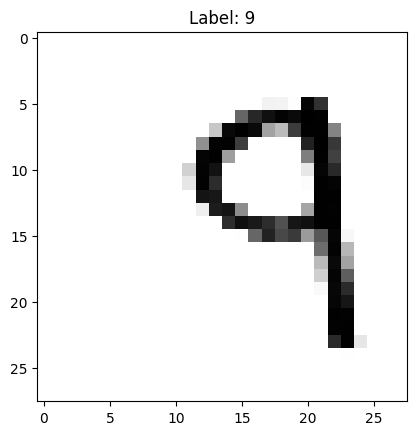

In [23]:
x_batch, y_batch = next(train_generator)  

# Plot the image
plt.imshow(x_batch[0]) 
plt.title(f"Label: {y_batch[0].argmax()}")
plt.show()


In [24]:
history = model.fit(train_generator, epochs=100, validation_data=test_generator)
 

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.0997 - loss: 2.3216 - val_accuracy: 0.1000 - val_loss: 2.3158
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1003 - loss: 2.3132 - val_accuracy: 0.1000 - val_loss: 2.3101
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1022 - loss: 2.3072 - val_accuracy: 0.1001 - val_loss: 2.3058
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1011 - loss: 2.3022 - val_accuracy: 0.1003 - val_loss: 2.3024
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.1019 - loss: 2.2995 - val_accuracy: 0.1017 - val_loss: 2.2997
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1027 - loss: 2.2968 - val_accuracy: 0.1040 - val_loss: 2.2977
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1141 - loss: 2.2940 - val_accuracy: 0.1104 - val_loss: 2.2958
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1297 - loss: 2.2917 - val_accuracy: 0.1201 - v

In [25]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)

# Calculate accuracy in percentage
test_acc_percentage = test_acc * 100

# Print results
print(f"Test accuracy: {test_acc:.4f} ({test_acc_percentage:.2f}%)")

21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - accuracy: 0.6537 - loss: 1.2169
Test accuracy: 0.6542 (65.42%)


21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 760ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.10      0.11      0.11      4766
           1       0.10      0.10      0.10      4773
           2       0.10      0.06      0.08      4773
           3       0.10      0.11      0.10      4773
           4       0.11      0.13      0.12      4773
           5       0.09      0.08      0.08      4773
           6       0.10      0.10      0.10      4773
           7       0.11      0.08      0.10      4773
           8       0.10      0.11      0.11      4773
           9       0.10      0.13      0.11      4773

    accuracy                           0.10     47723
   macro avg       0.10      0.10      0.10     47723
weighted avg       0.10      0.10      0.10     47723



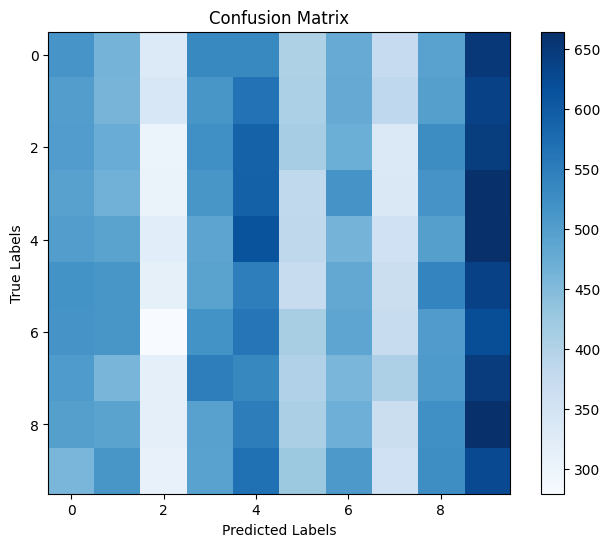

In [26]:
# Predict labels
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the generator
y_true = test_generator.classes

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


IT'S HERO TIME!!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


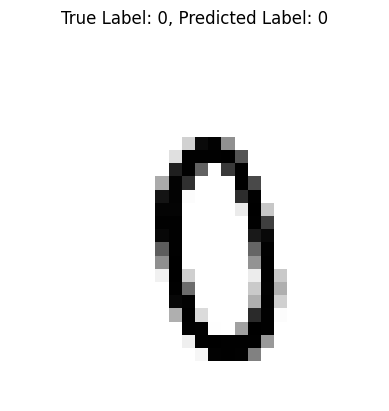

True Label: 0
Predicted Label: 0


In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt

def test_random_image(model, test_generator):
    # Get the total number of images in the test set
    total_images = test_generator.n
    
    # Get a random index for the image (not the batch)
    random_index = random.randint(0, total_images - 1)
    
    # Calculate which batch and image within the batch it corresponds to
    batch_index = random_index // test_generator.batch_size
    image_index_within_batch = random_index % test_generator.batch_size

    # Load the corresponding batch
    test_generator.reset()  # Reset the generator to avoid any shuffling issues
    batch = test_generator[batch_index]
    
    # Extract the image and label from the batch
    image = batch[0][image_index_within_batch]
    label = batch[1][image_index_within_batch]
    
    # Get the true label from the one-hot encoded form
    true_label = np.argmax(label)

    # Use the model to predict the digit
    prediction = model.predict(np.expand_dims(image, axis=0))  # Expand dims to match batch size
    predicted_label = np.argmax(prediction)

    # Display the image
    plt.imshow(image)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()

    # Print the result
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")

# Example of testing with the trained model
test_random_image(model, test_generator)


In [48]:
model.save("handwrittenDigitRecognition.h5")

In [6]:
  loaded_model = tf.keras.models.load_model("handwrittenDigitRecognition.h5")

Found 47723 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


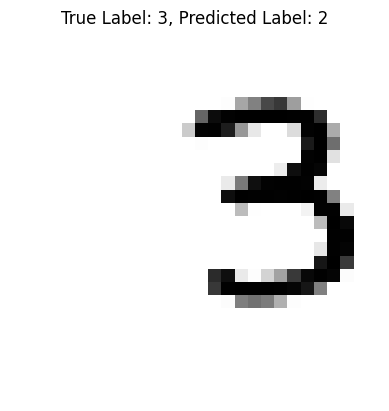

True Label: 3
Predicted Label: 2


In [27]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load the test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to the test directory
    target_size=(28, 28),  # Image size
    batch_size=1,  # Load one image at a time
    class_mode='categorical',
    color_mode='rgb',  # Use 'rgb' if images are in RGB format
    shuffle=True     # Disable shuffling to keep index for random sampling
)

# Randomly select an image from the test set
def test_random_image(model, test_generator):
    # Get a random index from the test set
    random_index = random.randint(0, len(test_generator.filenames) - 1)

    # Get the file path of the randomly selected image
    image_path = test_generator.filepaths[random_index]  # Get the file path

    # Load the corresponding image and label
    test_generator.reset()  # Reset the generator to avoid any shuffling issues
    test_generator.batch_index = random_index  # Set the batch index to the random image
    image, label = next(test_generator)  # Get the image and label

    # Get the true label from the one-hot encoded form
    true_label = np.argmax(label)

    # Use the model to predict the digit
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)

    # Display the image
    plt.imshow(image[0])  # The image is in a batch of 1, so we take the first element
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()

    # Print the result
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")

# Example of testing with the trained model
test_random_image(model, test_generator)
 